## Diversity in the Workforce - Group 6 Midterm Project

### Our libraries and dataset overview

In [1]:
#Importing all libraries needed
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Taking into consideration other systems
file = os.path.join('Resources', 'HRDataset_v14.csv')
file

#This is our main file with HR Data
HR_data = pd.read_csv(file)
HR_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/15,0,13
1,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,...,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/13,1,19
2,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/16,0,12
3,"Barton, Nader",10066,0,2,1,5,5,3,0,52505,...,Michael Albert,22.0,On-line Web application,Fully Meets,5.00,5,0,3/2/17,0,1
4,"Brill, Donna",10177,1,1,0,5,5,3,0,53492,...,David Stanley,14.0,Google Search,Fully Meets,3.35,4,0,3/4/13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Pelletier, Ermine",10297,1,1,0,5,5,2,0,60270,...,Amy Dunn,11.0,CareerBuilder,Needs Improvement,2.40,5,0,2/6/15,5,2
307,"Purinton, Janine",10262,0,2,0,5,5,3,0,46430,...,Kissy Sullivan,20.0,Indeed,Fully Meets,4.50,5,0,4/2/13,0,16
308,"Squatrito, Kristen",10030,0,2,0,5,5,4,0,62425,...,David Stanley,14.0,LinkedIn,Exceeds,4.10,4,0,3/2/15,0,16
309,"Trzeciak, Cybil",10270,0,0,0,5,5,3,0,74813,...,Amy Dunn,11.0,LinkedIn,Fully Meets,4.40,3,0,1/5/14,0,5


### Question 1: How does marital status affect performance?

In [3]:
#Reading the first few lines of data
HR_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/15,0,13
1,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,...,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/13,1,19
2,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/16,0,12
3,"Barton, Nader",10066,0,2,1,5,5,3,0,52505,...,Michael Albert,22.0,On-line Web application,Fully Meets,5.00,5,0,3/2/17,0,1
4,"Brill, Donna",10177,1,1,0,5,5,3,0,53492,...,David Stanley,14.0,Google Search,Fully Meets,3.35,4,0,3/4/13,0,6


In [4]:
#Grouping the columns by Marital Status and Performance Score
grouped_married_df = HR_data.groupby(['MaritalDesc','PerformanceScore']).count()

#Grouping by "married" instance and Performance Score
grouped_married_v2_df = HR_data.groupby(['MarriedID','PerformanceScore']).count()

In [5]:
#Getting only one count output
grouped_married_df=grouped_married_df.loc[:,["EmpID"]]
grouped_married_v2_df=grouped_married_v2_df.loc[:,["EmpID"]]

In [6]:
grouped_married_df.rename(columns = {'EmpID':'Count','MaritalDesc':'Marital Status Description'}, inplace=True)
grouped_married_v2_df.rename(columns = {'EmpID':'Count'}, inplace=True)
grouped_married_df

Count
MaritalDesc PerformanceScore        
Divorced    Exceeds                5
            Fully Meets           23
            Needs Improvement      2
Married     Exceeds               11
            Fully Meets          100
            Needs Improvement      7
            PIP                    6
Separated   Exceeds                2
            Fully Meets            9
            PIP                    1
Single      Exceeds               18
            Fully Meets          104
            Needs Improvement      9
            PIP                    6
Widowed     Exceeds                1
            Fully Meets            7

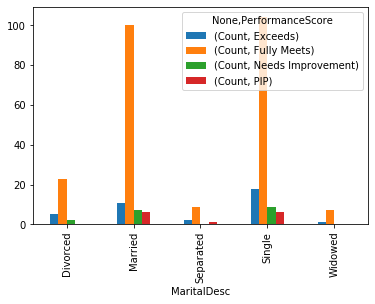

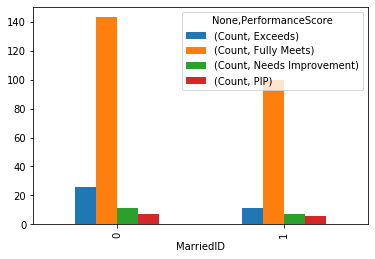

In [7]:
# Bar charts for analysis at two different levels of detail (LOD)
grouped_married_df.unstack().plot(kind = 'bar')
grouped_married_v2_df.unstack().plot(kind = 'bar')

In [8]:
#Overall Diversity base on Ethnicity or Race. 
Race_Desc = HR_data.groupby(['RaceDesc']).count()
Race_Desc.reset_index(inplace = True)

In [9]:
Race_Desc = Race_Desc.sort_values(by=['Employee_Name'],ascending=False)


<BarContainer object of 6 artists>

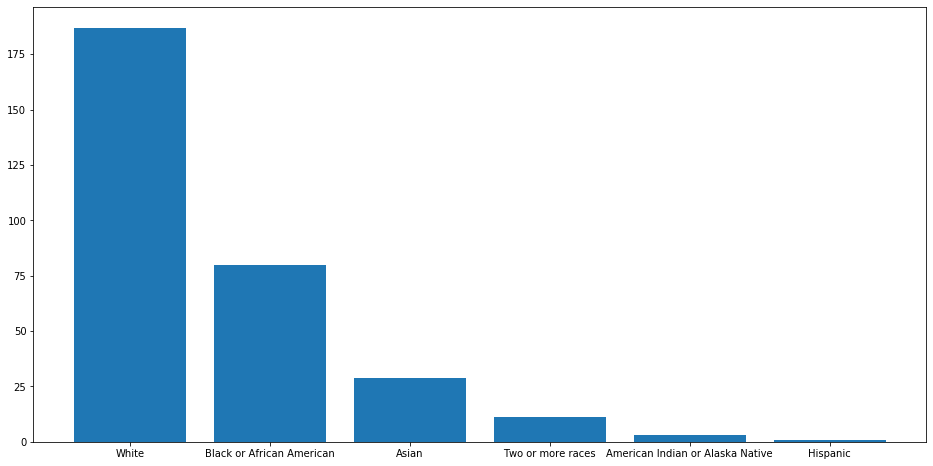

In [10]:
fig = plt.figure(figsize = (16,8))
plt.bar(Race_Desc['RaceDesc'],Race_Desc['Employee_Name'])

In [11]:
#Overall Diversity base on Gender and Department.
#Overall Diversity base on Gender and Recruitment Source.
#Overall Performance base on Recruitment Source.

In [12]:
Gender = HR_data.groupby(['GenderID']).count()
Gender.reset_index(inplace = True)
Gender

,GenderID,Employee_Name,EmpID,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,176,176,176,176,176,176,176,176,176,...,176,171,176,176,176,176,176,176,176,176
1,1,135,135,135,135,135,135,135,135,135,...,135,132,135,135,135,135,135,135,135,135


<BarContainer object of 2 artists>

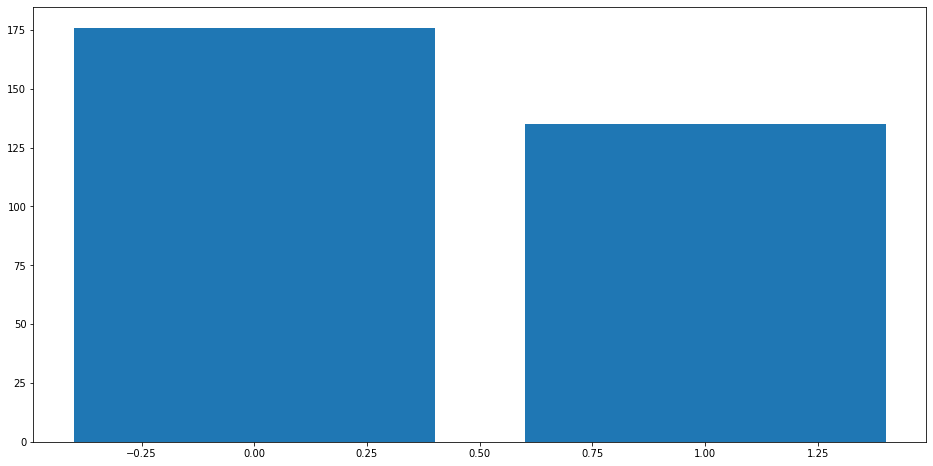

In [13]:
#Overall Diversity base on Gender.
fig = plt.figure(figsize = (16,8))
plt.bar(Gender['GenderID'],Gender['RaceDesc'])